In [1]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
#from warnings import simplefilter
import os.path
import pickle
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
#simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
ROOT_DIR = os.path.dirname(os.path.abspath('.'))
DATA_DIR = os.path.join(ROOT_DIR, 'data', '{folder}')
MODELS_DIR = os.path.join(ROOT_DIR, 'models')
data_file = os.path.join(DATA_DIR.format(folder='external'), 'creditcard.csv')

In [6]:
df_fraud = pd.read_csv(data_file)

In [7]:
df_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df_fraud.drop('Time',axis=1, inplace = True)

In [9]:
df_fraud.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


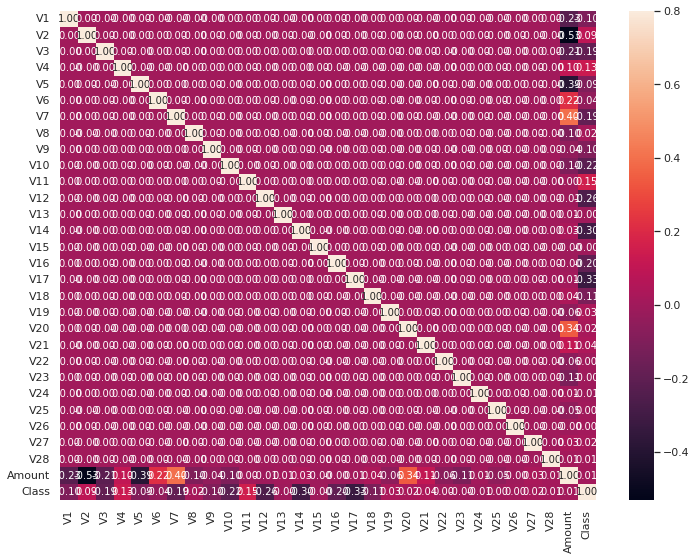

In [10]:
# Possibilita a análise simultânea da associação entre variáveis.
corr = df_fraud.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, annot_kws={'size': 10}, annot=True, fmt='.2f');

In [11]:
corr_list = corr['Class'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [12]:
X = df_fraud.drop('Class',axis=1)
y = df_fraud['Class']

In [13]:
# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=42)

0    213236
1     85294
Name: Class, dtype: int64


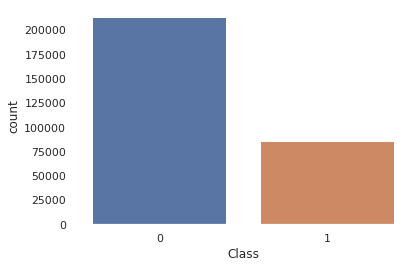

In [14]:
# usar técnica under-sampling
rus = RandomUnderSampler()
smote = SMOTE(sampling_strategy=0.4, random_state=42)

# X_res, y_res = rus.fit_resample(X_train, y_train)
X_res, y_res = smote.fit_resample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_res);

In [15]:
# Criando modelo de Machine Learning a partir de cada algoritmo
# Os dados estão em diferentes escalas e isso pode prejudicar a performance de alguns algoritmos.
# Vamos aplicar a  Padronização ao conjunto de dados (colocando-os na mesma escala).
# Nesta técnica, os dados serão transformados de modo que estejam com uma distribuição normal, com média igual a zero e
# desvio padrão igual a 1.

# Não utilizarei o modelo SVC, pois ele não funciona bem quando temos um grande conjunto de dados
# porque o tempo de treinamento necessário é maior. 

pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))),
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())]))),
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())]))),
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())]))),
#pipelines.append(('Scaled-SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in pipelines:
    kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=7)
    cross_val_result = model_selection.cross_val_score(modelo, 
                                                     X_res, 
                                                     y_res, 
                                                     cv = kfold, 
                                                     scoring = 'roc_auc')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

Scaled-LR: 0.994337 (0.000336)
Scaled-KNN: 0.999700 (0.000075)
Scaled-CART: 0.997640 (0.000241)
Scaled-NB: 0.961604 (0.002003)
Scaled-RF: 0.999997 (0.000002)


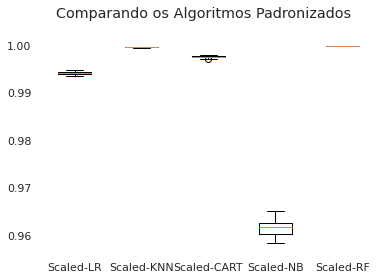

In [16]:
# De acordo com os resultados anteriores, os modelos criados com DecisionTree e Random Forest apresentaram 
# os melhores valores de acurácia e portanto os melhores resultados.
# Isso pode ser confirmado, comparando os algoritmos através de boxplots.
fig = plt.figure()
fig.suptitle('Comparando os Algoritmos Padronizados')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [17]:
# Embora o Random Forest tenha apresentado a menor taxa de erro após a padronização dos dados, podemos ainda otimizá-lo
# com o ajuste dos parâmetros.

# # Definindo a escala
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)

# Possíveis valores de estimators
val_estimators = [20, 50, 100, 150, 200]

# Possíveis valores para o critério de divisão
val_criterion = ['gini', 'entropy']

# Definindo um dicionário que recebe as listas de parâmetros e valores
parametros_grid = dict(n_estimators = val_estimators,
                       criterion = val_criterion)
                      
                       
# Criando o modelo
modelo_random = RandomForestClassifier()

# Definindo K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=42)

# Testando diferenets combinações com os parâmetros
grid = RandomizedSearchCV(estimator = modelo_random, param_distributions = parametros_grid, cv = kfold, scoring = 'roc_auc')
grid.fit(X_res, y_res)

# Print do resultado
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')

In [ ]:
clf = grid.best_estimator_

X_test_std = scaler.transform(X_test)
y_pred = clf.predict(X_test_std)

In [ ]:

roc_auc_score(y_test, y_pred)

In [ ]:
roc_curve(y_test, y_pred)

In [ ]:

model = pd.Series( {
    "model":clf,
    "features":X.columns }
)

model.to_pickle( os.path.join(MODELS_DIR, 'model.pkl') )